In [1]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import nltk
import plotly.express as px
import datetime
import plotly.graph_objects as go
import seaborn as sns


In [2]:


# Load the dataset
data = pd.read_csv(r'D:\NullClass Project\Play Store Data.csv')

# Remove duplicates
data.drop_duplicates(inplace=True)

# Handle missing values
data['Rating'].fillna(data['Rating'].median(), inplace=True)
data['Type'].fillna(data['Type'].mode()[0], inplace=True)
data['Content Rating'].fillna(data['Content Rating'].mode()[0], inplace=True)
data['Current Ver'].fillna("Unknown", inplace=True)
data['Android Ver'].fillna("Unknown", inplace=True)

# Remove rating outliers (keep ratings <= 5)
data = data[data['Rating'] <= 5]

# Convert 'Installs', 'Size', and 'Price' to numeric
data['Installs'] = data['Installs'].str.replace('[+,]', '', regex=True).astype(float)
data['Size'] = data['Size'].replace('Varies with device', np.nan).str.replace('M', 'e6').str.replace('k', 'e3').astype(float)
data['Price'] = data['Price'].str.replace('$', '').astype(float)

# Convert 'Last Updated' to datetime format
data['Last Updated'] = pd.to_datetime(data['Last Updated'])


C:\Users\Asus\AppData\Local\Temp\ipykernel_18904\866600548.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Rating'].fillna(data['Rating'].median(), inplace=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_18904\866600548.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


Task 1: Generate a Word Cloud for 5-Star Reviews in Health & Fitness

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


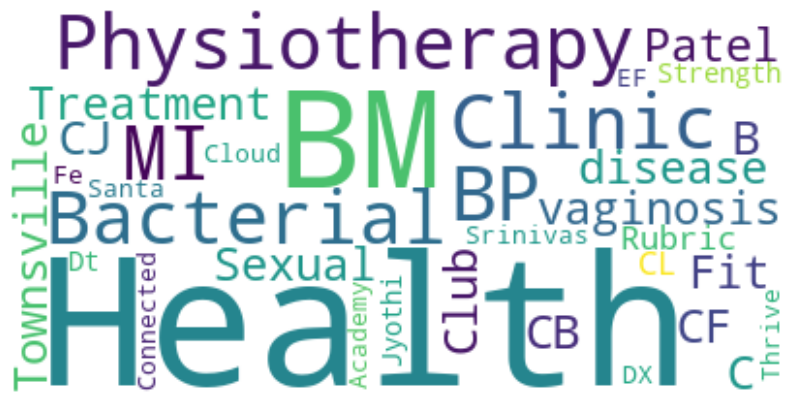

In [3]:


nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Filter for Health & Fitness category and 5-star ratings
health_fitness_reviews = data[(data['Category'] == 'HEALTH_AND_FITNESS') & (data['Rating'] == 5)]

# Generate word cloud text after removing stopwords and common words
reviews_text = " ".join(review for review in health_fitness_reviews['App'])
wordcloud = WordCloud(stopwords=stop_words, background_color='white').generate(reviews_text)

# Display the word cloud
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


Task 2: Interactive Choropleth Map for Global Installs by Country

In [11]:
import plotly.express as px
import datetime

# Check if 'Country' exists in the DataFrame
if 'Country' not in data.columns:
    print("The 'Country' column is missing from the data.")
else:
    # Filter data based on task criteria
    top_categories = data['Category'].value_counts().nlargest(5).index
    choropleth_data = data[(data['Category'].isin(top_categories)) &
                           (data['Installs'] > 1e6) &
                           (~data['Category'].str.startswith(tuple('ACGS')))]

    # Get current time to restrict display hours
    current_hour = datetime.datetime.now().hour
    if not (12 <= current_hour <= 18):  # Show only outside 12 PM - 6 PM
        # Create choropleth map
        fig = px.choropleth(
            choropleth_data,
            locations="Country",  # Ensure this matches your DataFrame's country column name
            locationmode='country names',
            color="Installs",
            hover_name="App",
            color_continuous_scale="Viridis",
            title="Global Installs by Country"
        )
        fig.show(renderer="browser")  # Open in browser if not displaying inline
    else:
        print("The choropleth map is not available between 12 PM and 6 PM.")

The 'Country' column is missing from the data.


Task 3: Grouped Bar Chart for Top 10 App Categories

In [9]:
# Filter for specific conditions
jan_data = data[(data['Last Updated'].dt.month == 1) &
                (data['Rating'] >= 4.0) & 
                (data['Size'] >= 10e6)]

# Get top 10 categories by total installs
top_10_categories = jan_data.groupby('Category')['Installs'].sum().nlargest(10).index
filtered_data = jan_data[jan_data['Category'].isin(top_10_categories)]

# Create grouped bar chart
fig = go.Figure()

# Define a color palette
colors = px.colors.qualitative.Plotly

for i, category in enumerate(top_10_categories):
    cat_data = filtered_data[filtered_data['Category'] == category]
    fig.add_trace(go.Bar(
        name=category,
        x=cat_data['Category'],
        y=cat_data['Installs'],
        text=cat_data['Reviews'],
        marker=dict(color=colors[i % len(colors)], line=dict(width=1, color='DarkSlateGrey')),
        hovertemplate='<b>%{x}</b><br>Installs: %{y}<br>Reviews: %{text}<extra></extra>'
    ))

# Update layout for better aesthetics
fig.update_layout(
    barmode='group',
    title="Total Installs and Review Count for Top 10 Categories",
    title_font=dict(size=24, color='DarkSlateBlue', family='Arial Black'),
    xaxis_title="Categories",
    yaxis_title="Total Installs",
    xaxis_tickangle=-45,
    yaxis=dict(title_font=dict(size=16), tickfont=dict(size=14)),
    legend_title_text='Categories',
    legend=dict(title_font=dict(size=16), font=dict(size=12)),
    plot_bgcolor='rgba(240,240,240,0.95)',  # Light gray background
    margin=dict(l=40, r=40, t=40, b=40),
)

# Show the figure or save as HTML if there's an error
try:
    fig.show()
except Exception as e:
    print("Error displaying figure:", e)
    fig.write_html("top_categories_january.html")
    print("Figure saved as 'top_categories_january.html'. Open this file in a web browser to view the chart.")

Task 4: Dual-Axis Chart for Free vs. Paid Apps in Top 3 Categories

<>:4: SyntaxWarning: invalid escape sequence '\$'
<>:4: SyntaxWarning: invalid escape sequence '\$'
C:\Users\Asus\AppData\Local\Temp\ipykernel_18904\21623704.py:4: SyntaxWarning: invalid escape sequence '\$'
  data['Price'] = data['Price'].replace({'\$': '', ' ': ''}, regex=True).astype(float)


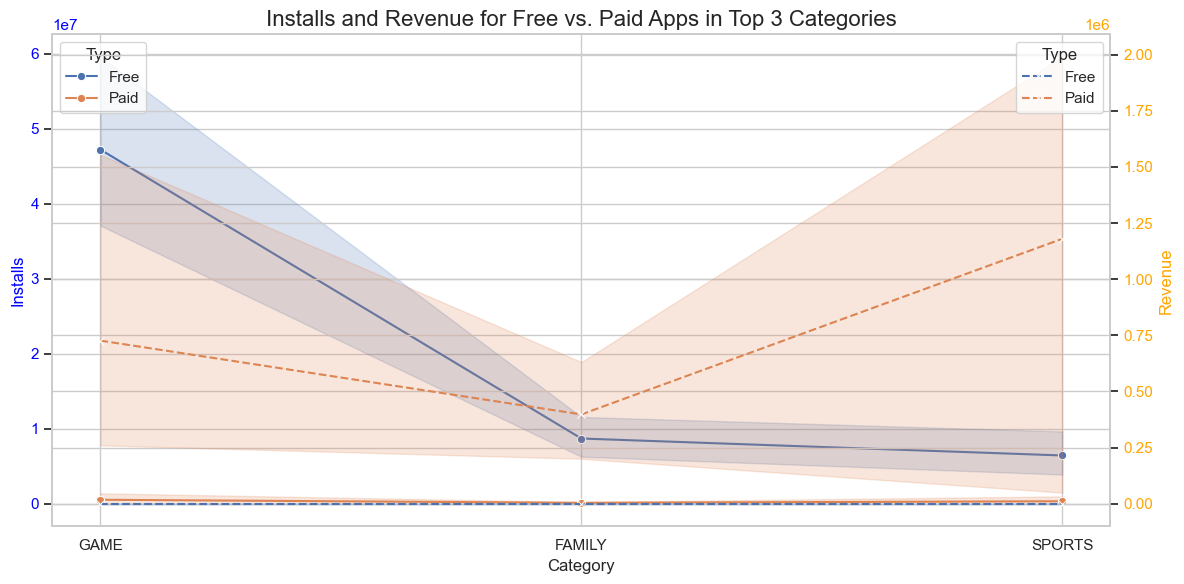

In [8]:


# Assuming 'data' is your DataFrame containing the app data
# Create a Revenue column based on Price and Installs
# Ensure that Price is numeric (remove any $ sign and convert to float if necessary)
data['Price'] = data['Price'].replace({'\$': '', ' ': ''}, regex=True).astype(float)

# Calculate Revenue: For Free apps, revenue is 0; for Paid apps, it's Price * Installs
data['Revenue'] = data.apply(lambda row: row['Price'] * row['Installs'] if row['Type'] == 'Paid' else 0, axis=1)

# Filter data for specified conditions
dual_axis_data = data[(data['Installs'] >= 1e4) &
                      (data['Type'].isin(['Free', 'Paid'])) &
                      (data['Size'] >= 15e6) &
                      (data['Android Ver'] > '4.0')]

# Top 3 categories by installs
top_3_categories = dual_axis_data['Category'].value_counts().nlargest(3).index
dual_axis_data = dual_axis_data[dual_axis_data['Category'].isin(top_3_categories)]

# Plot dual-axis chart
sns.set_theme(style="whitegrid")
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plotting Installs on primary y-axis
sns.lineplot(data=dual_axis_data, x="Category", y="Installs", hue="Type", ax=ax1, marker='o')
ax1.set_ylabel("Installs", color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Creating twin axis for Revenue
ax2 = ax1.twinx()
sns.lineplot(data=dual_axis_data, x="Category", y="Revenue", hue="Type", ax=ax2, linestyle="--", marker='x')
ax2.set_ylabel("Revenue", color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Title and layout adjustments
plt.title("Installs and Revenue for Free vs. Paid Apps in Top 3 Categories", fontsize=16)
plt.xticks(rotation=45)
ax1.legend(title='Type', loc='upper left')
ax2.legend(title='Type', loc='upper right')

plt.tight_layout()  # Adjust layout to prevent clipping of ylabel
plt.show()

Task 5: Bubble Chart for App Size vs. Rating in Games Category

In [16]:
import plotly.express as px
import datetime

# Filter for specific conditions in Games category
bubble_data = data[(data['Category'] == 'GAME') &
                   (data['Rating'] > 3.5) &
                   (data['Installs'] > 50000)]

# Check if bubble_data is empty
if bubble_data.empty:
    print("No data available for the specified conditions.")
else:
    # Optionally remove time restriction for testing
    # current_hour = datetime.datetime.now().hour
    # if 12 <= current_hour <= 16:  # Show only from 12 PM to 4 PM
    fig = px.scatter(bubble_data, x="Size", y="Rating", size="Installs", color="Category",
                     hover_name="App", log_x=True, size_max=60, title="App Size vs. Rating in Games Category")
    fig.show(renderer="browser")  # Open in browser if not displaying inline
    # else:
    #     print("The bubble chart is not available between 12 PM and 4 PM.")


Task 6: Violin Plot for Rating Distribution by Category

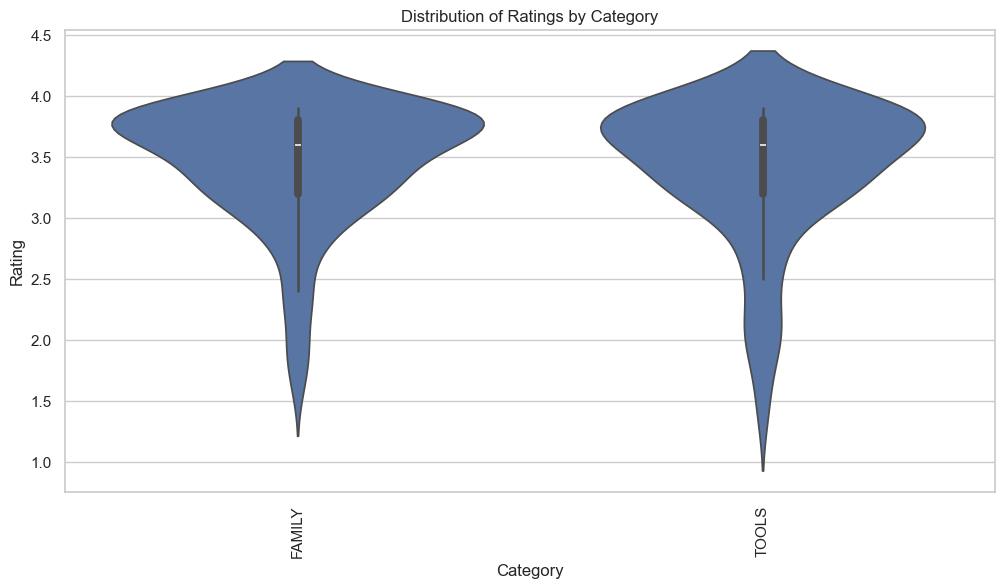

In [16]:

# Assuming 'data' is your DataFrame containing the app data

# Convert Reviews to numeric, coercing errors to NaN
data['Reviews'] = pd.to_numeric(data['Reviews'], errors='coerce')

# Filter data for specified conditions
violin_data = data[(data['Rating'] < 4.0) &
                   (data['Reviews'] >= 10) &
                   (data['App'].str.contains('C'))]

# Filter for categories with more than 50 apps
category_counts = violin_data['Category'].value_counts()
valid_categories = category_counts[category_counts > 50].index
violin_data = violin_data[violin_data['Category'].isin(valid_categories)]

# Plot violin plot
current_hour = datetime.datetime.now().hour
if not (18 <= current_hour <= 23):  # Show outside 6 PM to 11 PM
    plt.figure(figsize=(12, 6))
    sns.violinplot(data=violin_data, x="Category", y="Rating")
    plt.title("Distribution of Ratings by Category")
    plt.xticks(rotation=90)
    plt.show()

Task 7: Heatmap of Correlations Between Installs, Ratings, and Review Counts

d:\NullClass Project\.venv\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning:

All-NaN slice encountered

d:\NullClass Project\.venv\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning:

All-NaN slice encountered



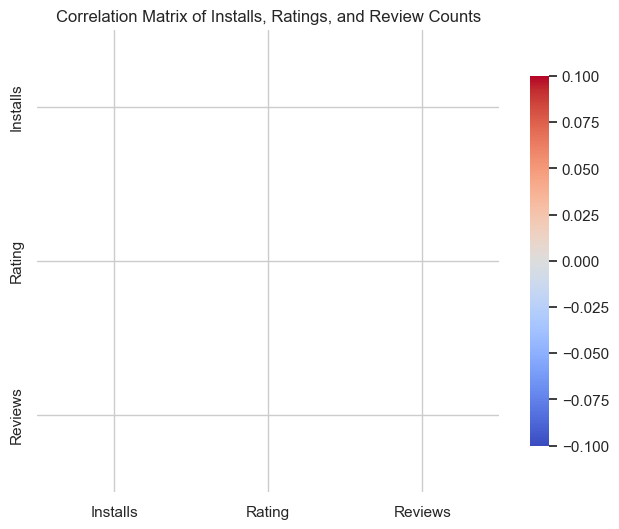

In [22]:


# Assuming 'data' is your DataFrame containing the app data

# Ensure 'Last Updated' is in datetime format
data['Last Updated'] = pd.to_datetime(data['Last Updated'], errors='coerce')

# Convert Reviews to numeric, coercing errors to NaN
data['Reviews'] = pd.to_numeric(data['Reviews'], errors='coerce')

# Get the current time and define the time window to exclude (3 PM to 6 PM)
current_time = datetime.datetime.now()
start_time = current_time.replace(hour=15, minute=0, second=0, microsecond=0)
end_time = current_time.replace(hour=18, minute=0, second=0, microsecond=0)

# Filter data updated in the last year and with specified installs/reviews,
# excluding the specified time window
heatmap_data = data[
    (data['Last Updated'] >= pd.to_datetime("now") - pd.DateOffset(years=1)) &
    (data['Installs'] >= 1e5) & 
    (data['Reviews'] > 1000) &
    (~data['Genres'].str.startswith(tuple("AFEGIK"))) &
    ~((data['Last Updated'].dt.time >= start_time.time()) & (data['Last Updated'].dt.time <= end_time.time()))
]

# Correlation matrix and heatmap
corr = heatmap_data[['Installs', 'Rating', 'Reviews']].corr()

plt.figure(figsize=(8, 6))  # Set figure size for better visibility
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", square=True, cbar_kws={"shrink": .8})
plt.title("Correlation Matrix of Installs, Ratings, and Review Counts")
plt.show()